## Variables Aleatorias y Teorema del Límite Central

#### Integrantes:


In [127]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
from scipy import stats

### Distribución de Poisson y Límite Central

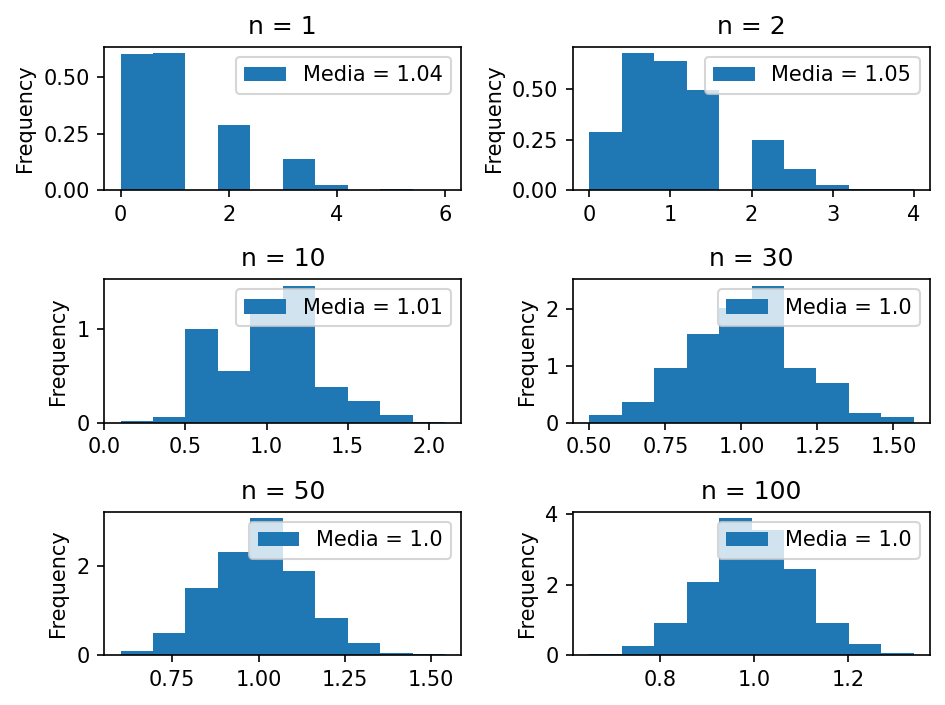

In [128]:
N = 1000
data = pd.DataFrame([])
ks = 0
plt.figure(dpi=150)
change = [1,2,10,30,50,100]

for n in change:
    ks +=1
    nStr = "n = " + str(n)
    Xbar = []
    for k in range(N):
        x = np.random.poisson(size=n)
        Xbar.append(np.average(x))
        # Xbar.append(np.var(x))
    data[nStr] = Xbar
    plt.subplot(3,2,ks)
    data[nStr].plot.hist(label="Media = " + str(round(data[nStr].mean(),2)), density=True)
    plt.legend()
    plt.title(nStr)
plt.tight_layout()

### Preguntas de autoexplicación

3. Obtenga figuras similares con dos distribuciones estadísticas diferentes a la normal y a la de Poisson.
   
Aplicando el teorema de límite central, se puede demostrar que la suma de variables aleatorias independientes y con distribución diferente a la normal, se aproxima a una distribución normal. En este caso, además de la distribución de Poisson, se puede utilizar la distribución binomial y la distribución exponencial.

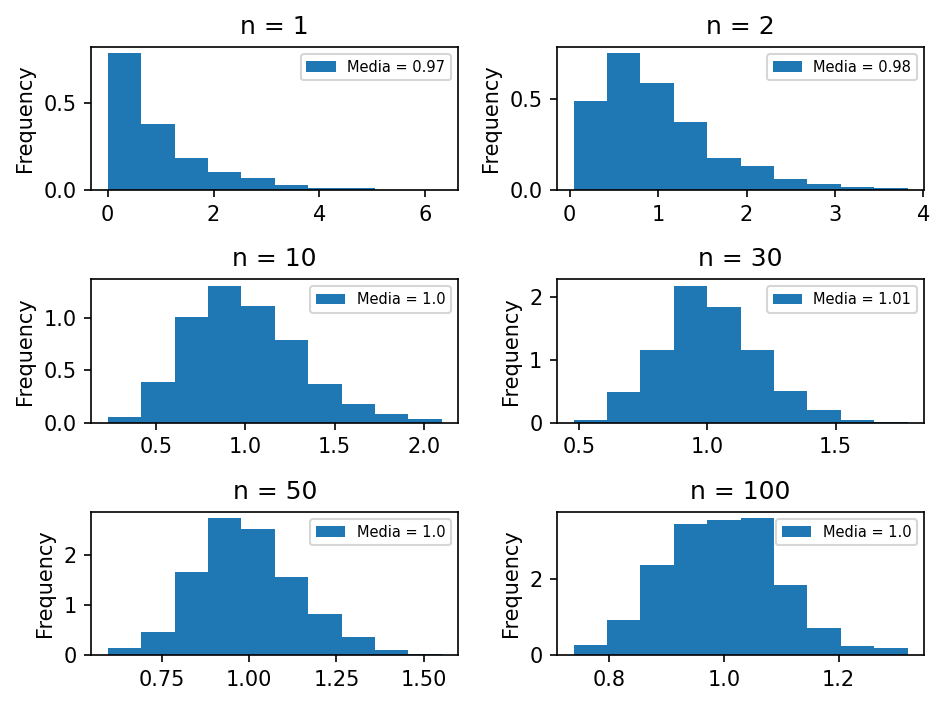

In [129]:
# Realicemos el mismo procedimiento para la distribución exponencial
N = 1000


data_binomial = pd.DataFrame([])
ks = 0
plt.figure(dpi=150)
change = [1,2,10,30, 50, 100]
for n in change:
    ks +=1
    nStr = "n = " + str(n)
    Xbar = []
    for k in range(N):
        x = np.random.exponential(size=n)
        Xbar.append(np.average(x))
    data_binomial[nStr] = Xbar
    plt.subplot(3,2,ks)
    data_binomial[nStr].plot.hist(label="Media = " + str(round(data_binomial[nStr].mean(),2)), density=True)
    plt.legend(loc="upper right", fontsize=7)
    plt.title(nStr)
plt.tight_layout()

Vemos que en este caso se tiene una distribución exponencial con media alrededor de 1 y 1000 observaciones. Se puede observar que la distribución de la suma de las variables aleatorias se aproxima a una distribución normal a medida que se aumenta el número de muestras. 

A continuación vamos a trabajar con una distribución hipergeométrica.

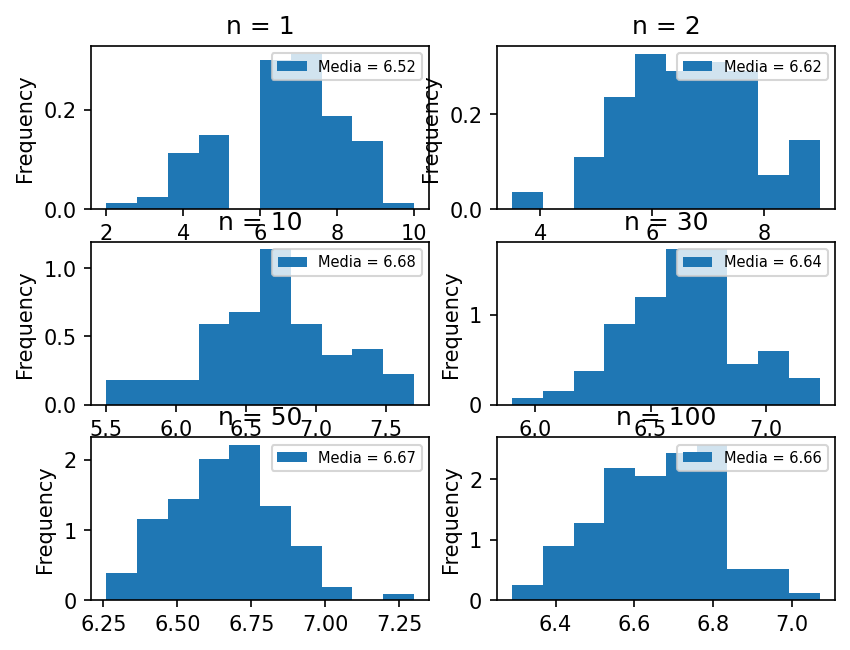

In [130]:
# Realicemos el mismo procedimiento para la distribución hipergeometrica

N = 100
data_h_geom = pd.DataFrame([])
ks = 0
plt.figure(dpi=150)
change = [1,2,10,30, 50, 100]
for n in change:
    ks +=1
    nStr = "n = " + str(n)
    Xbar = []
    for k in range(N):
        x = np.random.hypergeometric(100, 50, 10, size=n)
        Xbar.append(np.average(x))
    data_h_geom[nStr] = Xbar
    plt.subplot(3,2,ks)
    data_h_geom[nStr].plot.hist(label="Media = " + str(round(data_h_geom[nStr].mean(),2)), density=True)
    plt.legend(loc="upper right", fontsize=7)
    plt.title(nStr)

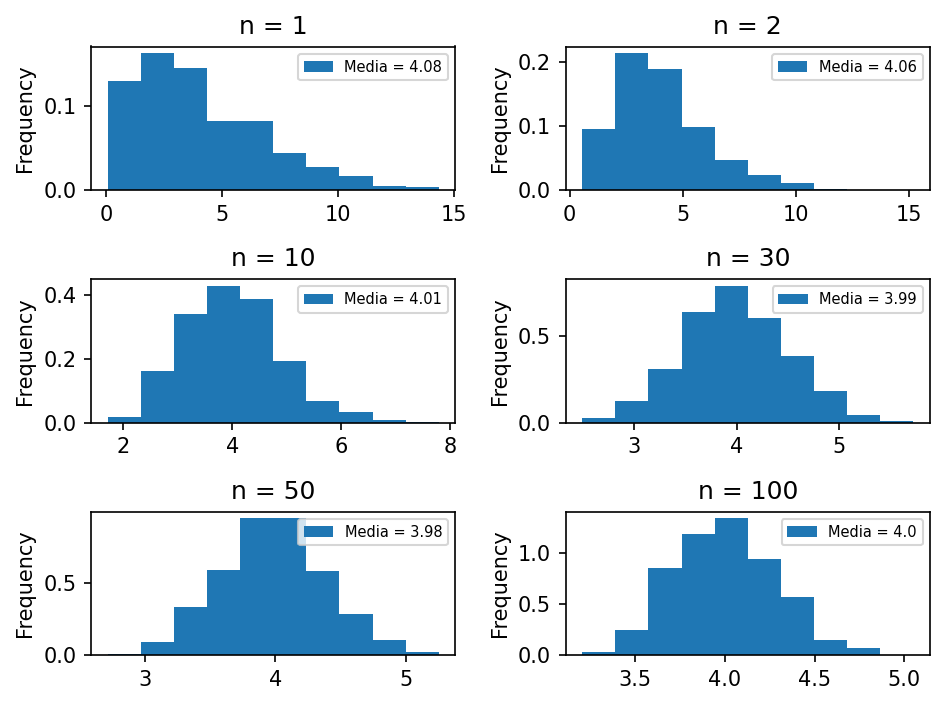

In [131]:
# Realicemos el mismo procedimiento para la distribución gamma

N = 1000
data_laplace = pd.DataFrame([])
ks = 0
plt.figure(dpi=150)
change = [1,2,10,30, 50, 100]
for n in change:
    ks +=1
    nStr = "n = " + str(n)
    Xbar = []
    for k in range(N):
        x = np.random.gamma(2, 2, size=n)
        Xbar.append(np.average(x))
    data_laplace[nStr] = Xbar
    plt.subplot(3,2,ks)
    data_laplace[nStr].plot.hist(label="Media = " + str(round(data_laplace[nStr].mean(),2)), density=True)
    plt.legend(loc="upper right", fontsize=7)
    plt.title(nStr)
plt.tight_layout()



4. Interprete los resultados obtenidos en términos del teorema del límite central. Aplique prueba de normalidad.
   
Además de utilizar la distribución de Poisson propuesta, se realizó el mismo análisis con las distribuciones exponencial, hipergeométrica y gamma. Los resultados muestran que en todos los casos, la distribución de la suma de las variables aleatorias tiende a aproximarse a una distribución normal a medida que aumenta el tamaño de la muestra. Este fenómeno se puede explicar mediante el teorema del límite central, el cual establece que la suma de variables aleatorias independientes, aunque no tengan una distribución normal, tiende a seguir una distribución normal a medida que se incrementa el tamaño de la muestra. Inicialmente, al realizar únicamente un muestreo, la distribución puede no parecer normal; sin embargo, a medida que se aumenta el número de muestras, se puede observar que la distribución de la suma de las variables aleatorias se aproxima a una distribución normal.

In [133]:
#Apliquemos prueba de normalidad a los datos

# Hipótesis nula: Los datos provienen de una distribución normal
# Hipótesis alternativa: Los datos no provienen de una distribución normal

# Prueba de normalidad de Shapiro-Wilk
prueba_p = pd.DataFrame([])

def prueba_Shapiro(df, distrib_name):
    for column in df:
        stat, p = stats.shapiro(df[column])
        stat = round(stat, 5)
        if p > 1e-6:  # Si el valor de p es mayor a 0.000001
            p = round(p, 5)
        else:
            p = f'{p:.5e}'  # Expresa el valor en notación científica con 5 dígitos
        prueba_p.at[distrib_name, column] = p

prueba_Shapiro(data, "Poisson")
prueba_Shapiro(data_binomial, "Exponencial")
prueba_Shapiro(data_h_geom, "Hipergeométrica")
prueba_Shapiro(data_laplace, "Gamma")

prueba_p


,n = 1,n = 2,n = 10,n = 30,n = 50,n = 100
Poisson,1.00109e-30,7.50270e-22,6.17355e-10,0.00087,0.00215,0.46029
Exponencial,6.85581e-32,3.32924e-24,3.49444e-10,0.00010,0.00006,0.01479
Hipergeométrica,0.00293,0.03196,0.46957,0.82433,0.40203,0.93037
Gamma,1.14484e-20,6.40775e-20,7.43524e-08,0.15410,0.56480,0.00225


Recordemos que la prueba de normalidad de Shapiro-Wilk es una prueba de bondad de ajuste que se utiliza para determinar si una muestra de datos proviene de una distribución normal. Si el valor p es mayor al nivel de significancia, se acepta la hipótesis nula de que los datos provienen de una distribución normal. En este caso, se observa que el valor p es mayor a 0.05, por lo que se no se rechaza la hipótesis nula y se concluye que la distribución de la suma de las variables aleatorias puede aproximarse a una distribución normal.
Vemos que a medida que se aumenta el número de muestras, el p-value aumenta y para el caso de n = 100, el p-value es superior para todas las distribuciones.